In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd
import matplotlib
from matplotlib import patches
from sympy import *
import datetime
from functools import reduce
from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
import scipy

from scipy.optimize import minimize

import sys
import os

import itertools
from scipy.special import binom
from scipy.stats import ortho_group

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

from itertools import cycle
from contextlib import redirect_stdout
from functools import reduce

In [2]:
def myrepr(x):
    return repr(round(x, 2)).replace('.',',') if isinstance(x, float) else repr(x)

In [3]:
from logreg_functions import *
from sigmoid_functions import *

In [88]:
project_path = "/Users/igorsokolov/Google_Drive/sign_sgd/"

experiment_name_short = "sign_sgd"
experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms"]
dataset_ar = ["australian"]

experiment_name = "sign_sgd_majority"

upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]

gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
#gamma_0_ar = [5.0, 7.0, 10.0]

n_workers_ar = [20]

#gamma_0_ar = [5]

loss_func_ar = ["log-reg", "sigmoid"]

#loss_func_ar = ["log-reg"]
loss_func_ar = ["sigmoid"]

#DEBUG PARAMS
#step_type_ar = ["var-step"]
#upd_option_ar = ["one-point"]
#gamma_0_ar = [5]


#loss_func_ar = ["sigmoid"]

#n_workers_ar = [1, 5, 10, 20, 50, 100, 200, 500]
batch_ar = [1]

with open('run_program_show_logs.sh', 'w') as f:
    with redirect_stdout(f):
        #print ("%%bash")
        print ("#!/bin/bash")
        datas = [experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar]
        
        total_n = reduce(lambda x,y: x * y, list(map(len, datas)))
        
        for i, (experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch) in \
        enumerate (itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar)):
            print ("mpirun -n {4} python3 sign_sgd_majority.py --dataset {5} --upd_option {0} --loss_func {1} --step_type {2} --max_it 300 --gamma_0 {3} &&".
        format(upd_option,loss_func,step_type,gamma_0, n_workers + 1, dataset))
            print ("echo {0} %".format(round(i/total_n*100, 2)))

        print ("\n")

        gamma_0_ar = np.array(gamma_0_ar).astype(float)
        
        #intersting to open txt with this gamma
        gamma_0_ar = np.array([5]).astype(float)
        
        #print ("%%bash")
        for experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch in \
        itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar):
            experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)    
            logs_path = project_path + "logs_{0}_{1}/".format(dataset, experiment)
            print ("open " + logs_path + 'output' + '_' + experiment + ".txt")


#show the script
f = open('run_program_show_logs.sh', 'r')
print (f.read())
f.close()

#!/bin/bash
mpirun -n 21 python3 sign_sgd_majority.py --dataset australian --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 300 --gamma_0 0.1 &&
echo 0.0 %
mpirun -n 21 python3 sign_sgd_majority.py --dataset australian --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 300 --gamma_0 0.5 &&
echo 2.08 %
mpirun -n 21 python3 sign_sgd_majority.py --dataset australian --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 300 --gamma_0 1.0 &&
echo 4.17 %
mpirun -n 21 python3 sign_sgd_majority.py --dataset australian --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 300 --gamma_0 2.0 &&
echo 6.25 %
mpirun -n 21 python3 sign_sgd_majority.py --dataset australian --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 300 --gamma_0 5.0 &&
echo 8.33 %
mpirun -n 21 python3 sign_sgd_majority.py --dataset australian --upd_option one-point --loss_func sigmoid --step_type var-step --max_it 300 --ga

In [78]:
os.path.exists("/Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_one-point_sigmoid_var-step_20_10,0_1")

True

In [6]:
os.path.isfile(data_path + 'w_init_{0}.npy'.format(loss_func))

NameError: name 'data_path' is not defined

In [90]:
%%bash
bash run_program_show_logs.sh

Process is terminated.


### Open log-reg results with gamma_0 = 5 

In [67]:
%%bash
open /Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_one-point_log-reg_var-step_20_5,0_1/output_sign_sgd_majority_one-point_log-reg_var-step_20_5,0_1.txt
open /Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_one-point_log-reg_fix-step_20_5,0_1/output_sign_sgd_majority_one-point_log-reg_fix-step_20_5,0_1.txt
open /Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_two-point_log-reg_var-step_20_5,0_1/output_sign_sgd_majority_two-point_log-reg_var-step_20_5,0_1.txt
open /Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_two-point_log-reg_fix-step_20_5,0_1/output_sign_sgd_majority_two-point_log-reg_fix-step_20_5,0_1.txt

### Open sigmoid results with gamma_0 = 5 

In [84]:
%%bash
open /Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_one-point_sigmoid_var-step_20_5,0_1/output_sign_sgd_majority_one-point_sigmoid_var-step_20_5,0_1.txt
open /Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_one-point_sigmoid_fix-step_20_5,0_1/output_sign_sgd_majority_one-point_sigmoid_fix-step_20_5,0_1.txt
open /Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_two-point_sigmoid_var-step_20_5,0_1/output_sign_sgd_majority_two-point_sigmoid_var-step_20_5,0_1.txt
open /Users/igorsokolov/Google_Drive/sign_sgd/logs_australian_sign_sgd_majority_two-point_sigmoid_fix-step_20_5,0_1/output_sign_sgd_majority_two-point_sigmoid_fix-step_20_5,0_1.txt

open folder

In [ ]:
print ("\n")
print ("%%bash")    
for experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch in \
itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar):
    experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)    
    logs_path = project_path + "logs_{0}_{1}/".format(dataset, experiment)
    print ("open " + logs_path)

In [ ]:
%%bash
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 200 --gamma_0 10 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type fix-step --max_it 200 --gamma_0 10 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option two-point --loss_func log-reg --step_type var-step --max_it 200 --gamma_0 10 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option two-point --loss_func log-reg --step_type fix-step --max_it 200 --gamma_0 10

bash commands

python3 generate_data.py --n_workers 3

mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 100 --gamma_0 1



firstly lets find f_min of log-reg mushrooms

## sign_sgd_one_point_majority_log-reg_var

load all existent data

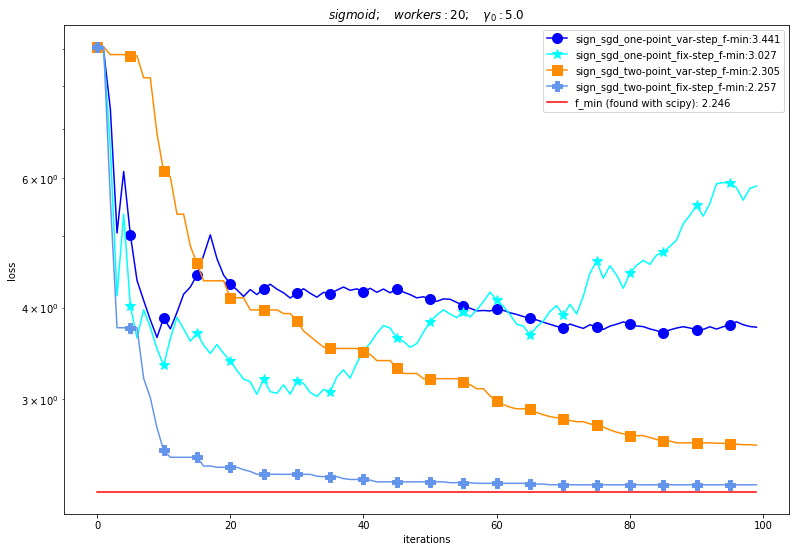

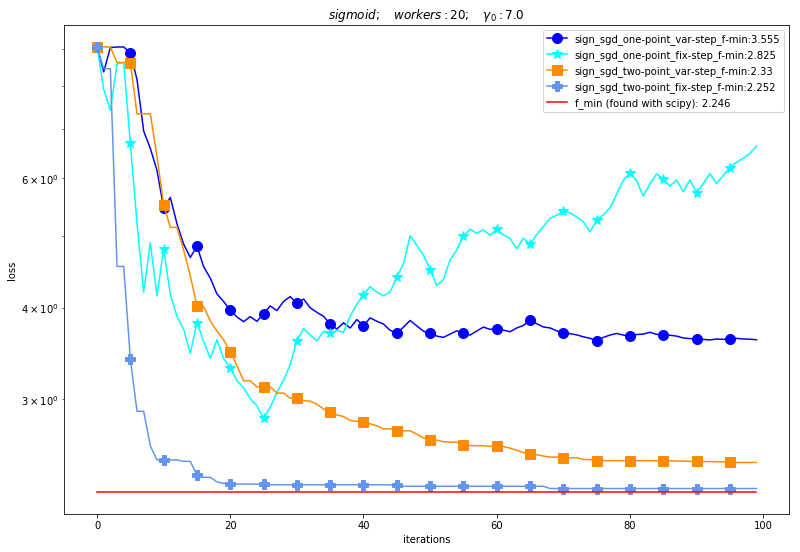

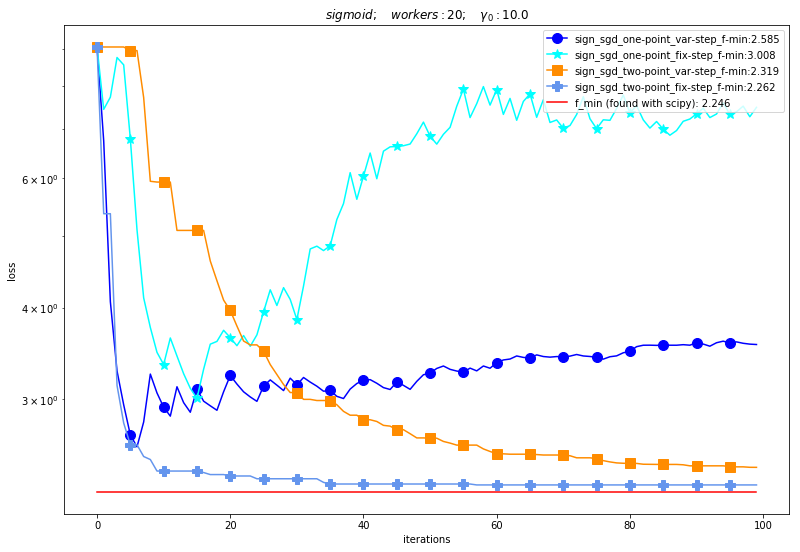

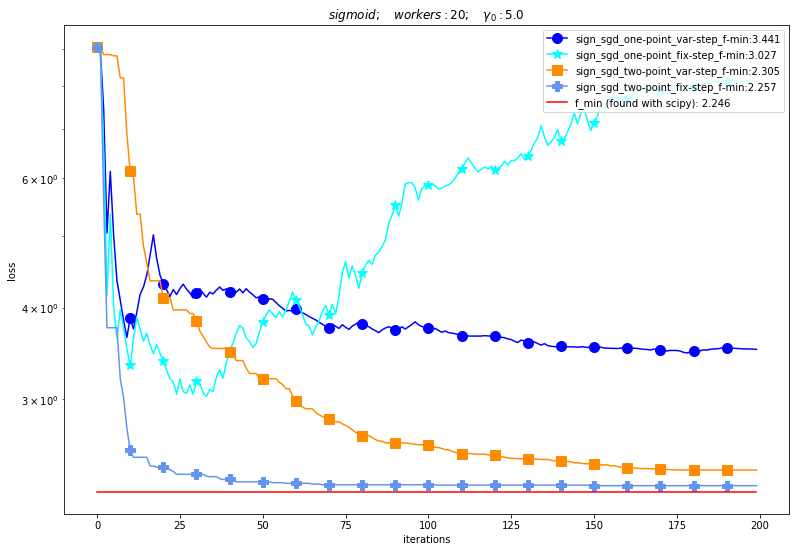

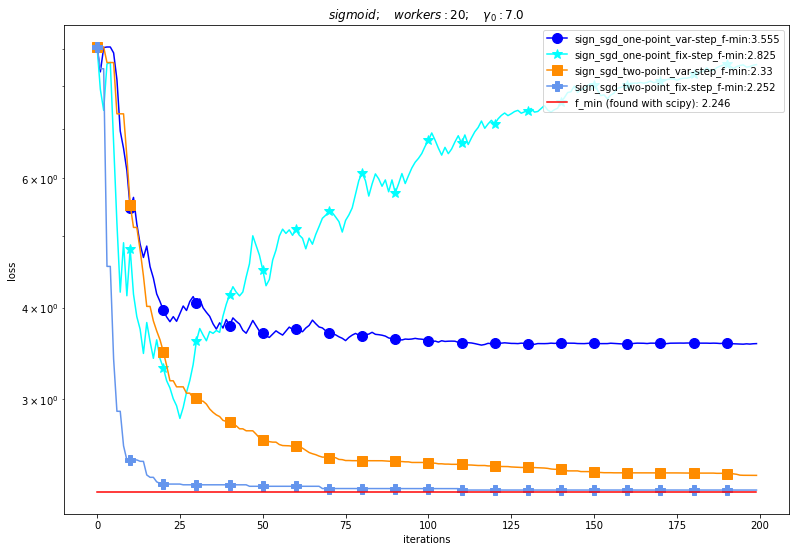

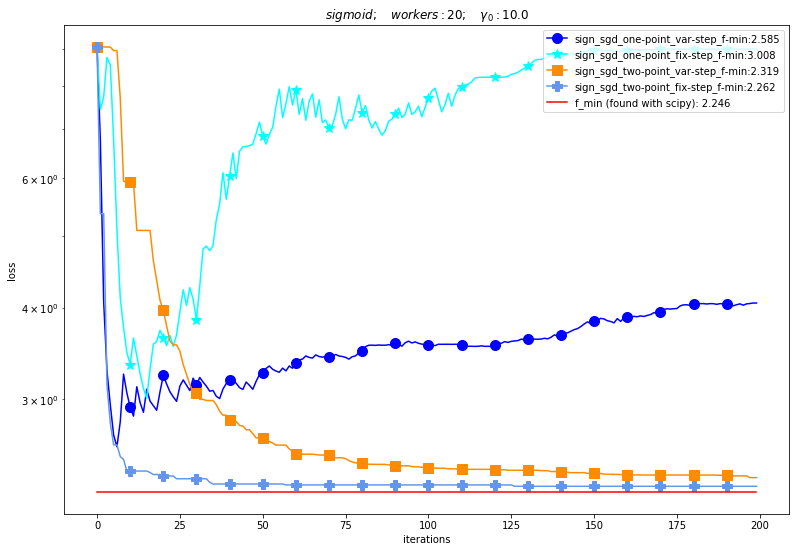

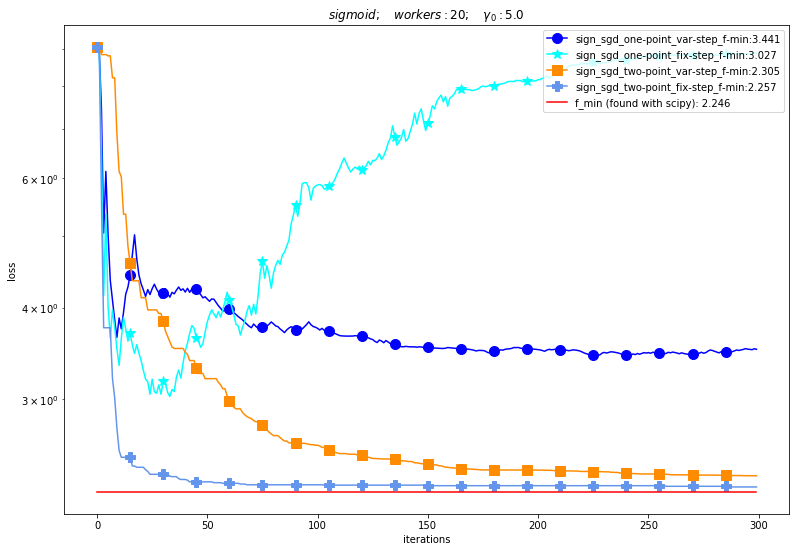

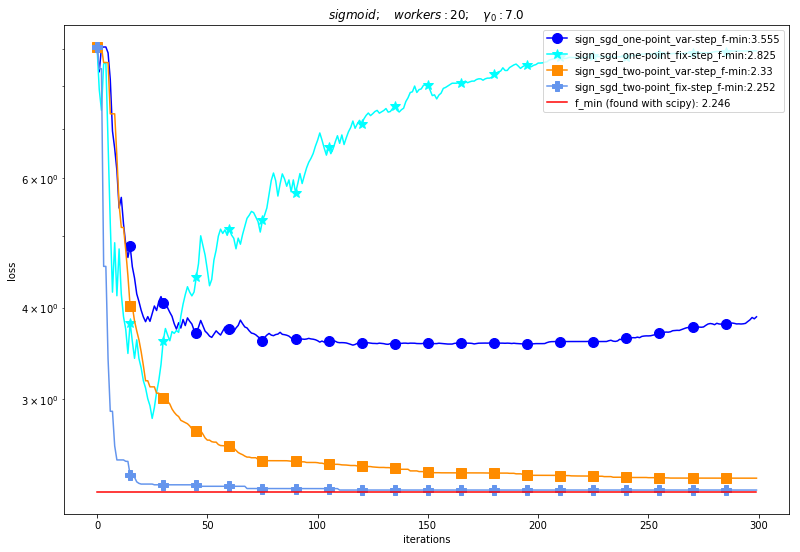

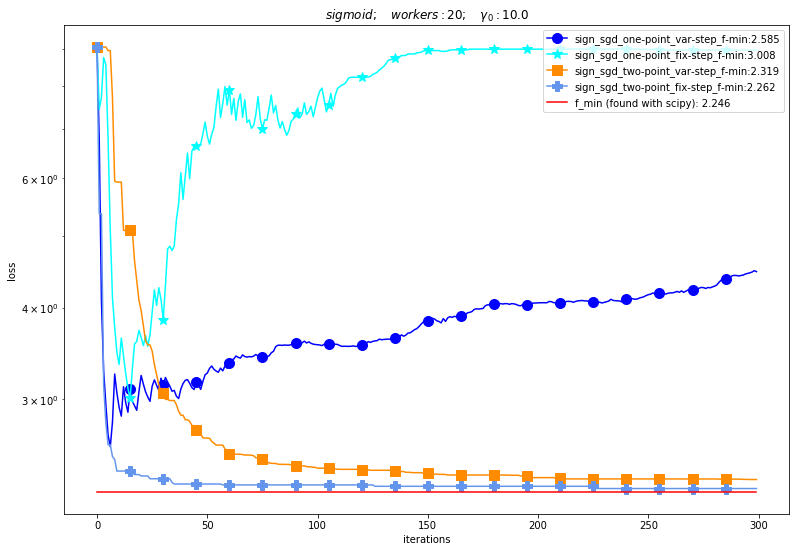

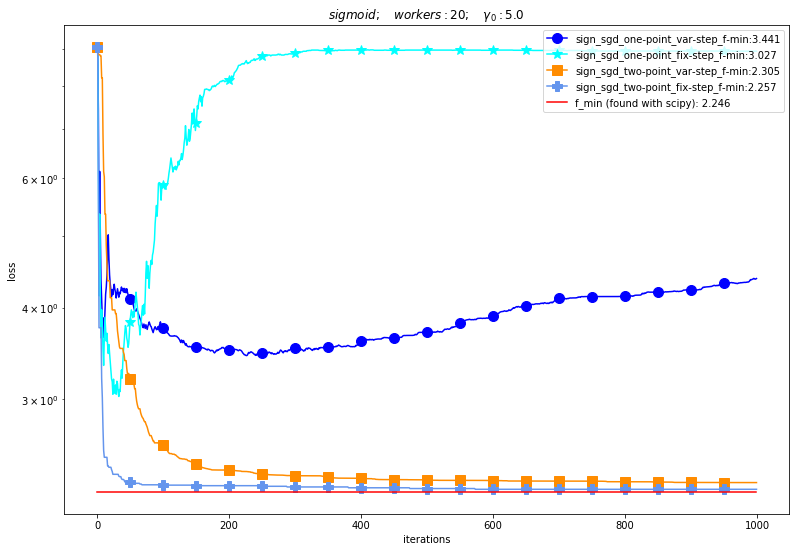

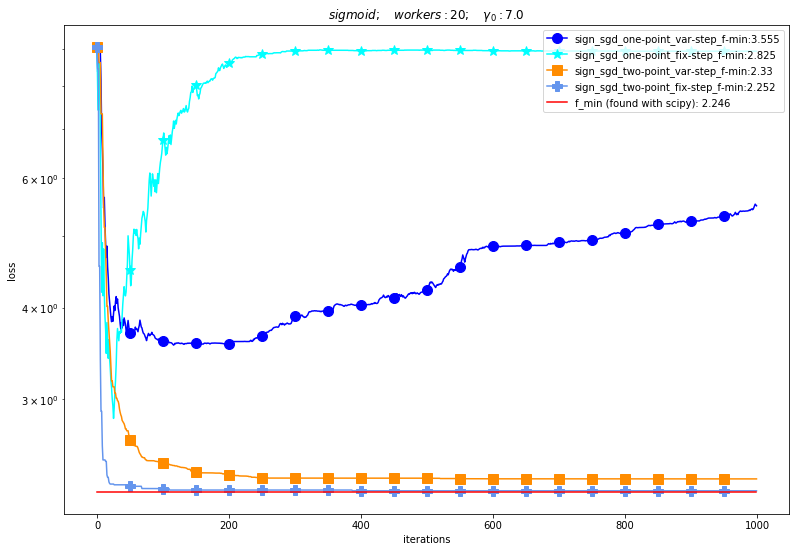

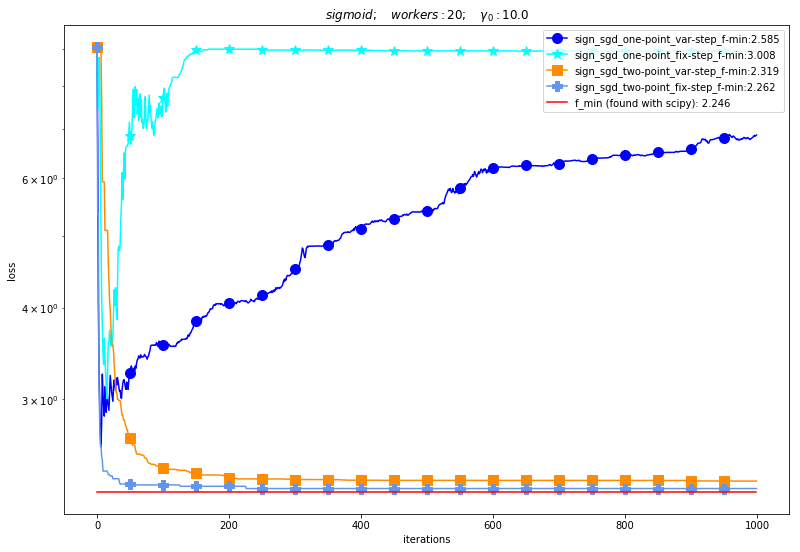

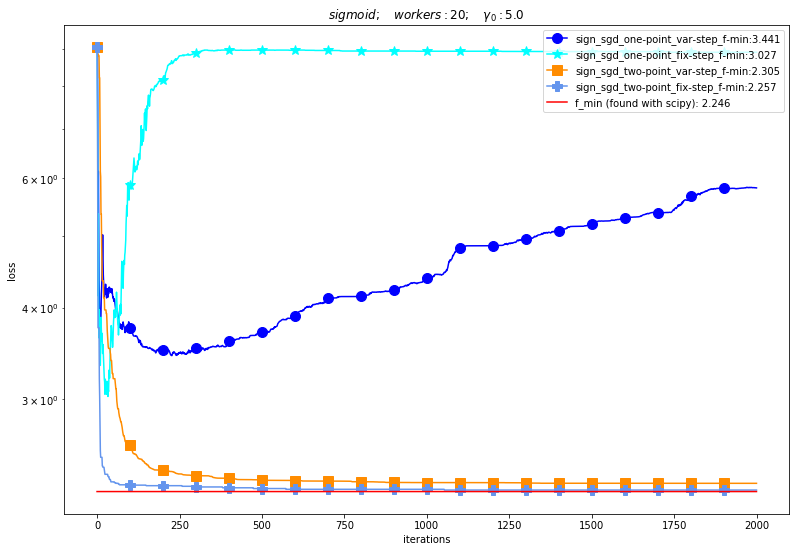

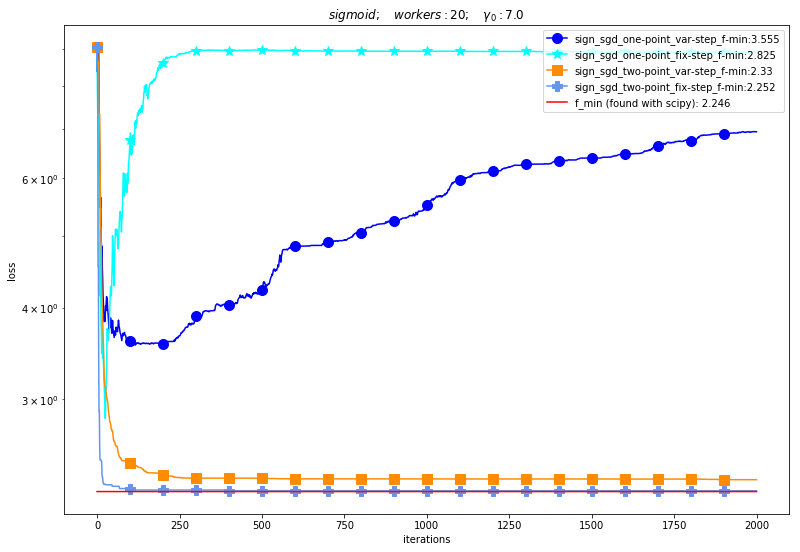

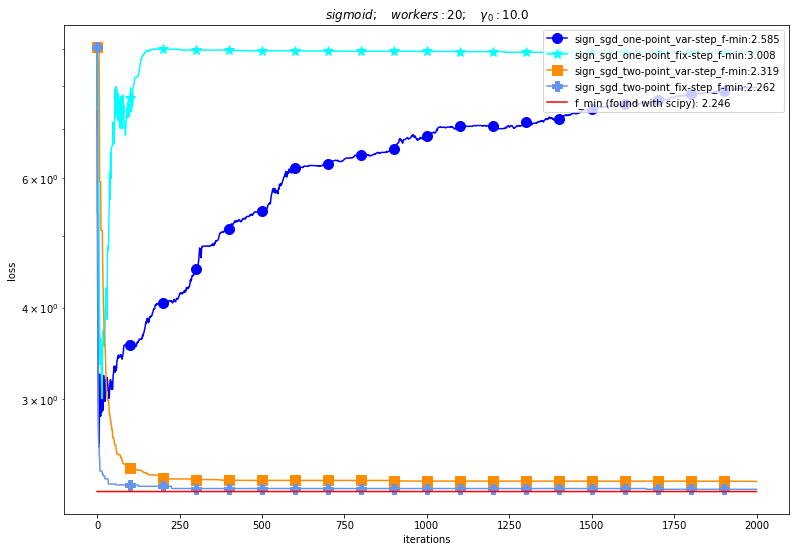

In [82]:
#upload whole data 
project_path = "/Users/igorsokolov/Google_Drive/sign_sgd/"

experiment_name_short = "sign_sgd"
experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms", "australian"]
loss_func_ar = ["log-reg", "sigmoid"]
upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]

n_workers_ar = [20]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]
#gamma_0_ar = [1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]

gamma_0_ar = [5.0, 7.0, 10.0]

batch_ar = [1]

clf_coef_ar = {}
X_train_ar = {}
y_train_ar = {}
la_ar = {}
f_min_ar = {}
info_num_ar = {}
loss_ar = {}
time_ar = {}
its_ar = {}
w_ar = {}
label_ar = {}

for experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch in \
itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar):
    experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)
    
    id_str = "{0}_{1}".format(dataset, experiment)#####
    id_func = "{0}_{1}".format(dataset, loss_func)#####
    id_dataset = "{0}_{1}".format(dataset, n_workers)#####
    id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
    
    logs_path = project_path + "logs_{0}_{1}/".format(dataset, experiment)
    data_path = project_path + "data_{0}_{1}/".format(dataset, n_workers)
    plot_path = project_path + "plot_{0}_{1}/".format(dataset, n_workers)
    
    if os.path.exists(plot_path) == False:
        os.mkdir(plot_path)
    
    if os.path.isfile(data_path + 'X.npy'):
        X_train_ar[id_dataset] = np.load(data_path + 'X.npy')
    if os.path.isfile(data_path + 'y.npy'):
        y_train_ar[id_dataset] = np.load(data_path + 'y.npy')
    
    if os.path.isfile(data_path + 'data_info.npy'): 
        data_info = np.load(data_path + 'data_info.npy')
        N, L = data_info[:2]
        
        if os.path.isfile(data_path + "{0}_clf_coef.npy".format(loss_func)):
            clf_coef_ar[id_func] = np.load(data_path + "{0}_clf_coef.npy".format(loss_func))
            
            if os.path.isfile(data_path + "{0}_f_min.npy".format(loss_func)):
                f_min_ar[id_func] = float (np.load(data_path + "{0}_f_min.npy".format(loss_func)))
                #print(f_min_ar[id_func], type(f_min_ar[id_func]))
    
    
    
    if os.path.isfile(logs_path + 'info_number' + "_" + experiment + ".npy"): 
        info_num_ar[id_str]    = np.load(logs_path + 'info_number' + "_" + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'loss' + "_" + experiment + ".npy"):
        loss_ar[id_str] = np.load(logs_path + 'loss' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'time' + "_" + experiment + ".npy"):
        time_ar[id_str]        = np.load(logs_path + 'time' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'iteration' + "_" + experiment + ".npy"):
        its_ar[id_str] = np.load(logs_path + 'iteration' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'iterates' + "_" + experiment + ".npy"):
        w_ar[id_str] = np.load(logs_path + 'iterates' + '_' + experiment + ".npy")
        
    label_ar[id_label] = id_label

keys = list (label_ar.keys())
values = ['o','*','s','P']
marker_ar = dict(zip(keys, values))

#what dow you want to show in the plot   

experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["australian"]

loss_func_ar = ["log-reg"]
loss_func_ar = ["sigmoid"]

#loss_func_ar = ["log-reg", "sigmoid"]

upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]
n_workers_ar = [20]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]
gamma_0_ar = [1.0, 2.0, 5.0, 10.0, 20.0, 50.0]
gamma_0_ar = [100.0, 200.0, 500.0]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]

gamma_0_ar = [5.0, 7.0, 10.0]

gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0, 1000.0]

#DEBUG OPTION
#upd_option_ar = ["one-point"]
#step_type_ar = ["var-step"]
#gamma_0_ar = [5.0]


batch_ar = [1]
colors = ['blue', 'aqua', 'darkorange', 'cornflowerblue', 'red']

n_iter_ar = [100, 200, 300, 1000, 2000]
for n_iter in n_iter_ar:
    #plt.plot(its_ar[:np.argmin (loss_ar)], loss_ar[:np.argmin (loss_ar)], color=color, label=str(label_ar[0]))
    for gamma_0 in  gamma_0_ar:
        for i, (experiment_name, dataset, loss_func, upd_option, step_type, n_workers, batch) in \
        enumerate(itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar,batch_ar)):
            experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)

            id_str = "{0}_{1}".format(dataset, experiment)
            id_func = "{0}_{1}".format(dataset, loss_func)
            id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)

            if  ((id_str in its_ar) and id_str in loss_ar):
                if n_iter is None:
                    markers_on = its_ar[id_str][ its_ar[id_str]%10==0 ]
                    plt.plot(its_ar[id_str], loss_ar[id_str], color=colors[i], marker=marker_ar[id_label], markersize=10, markevery=markers_on, label= label_ar[id_label] + "_f-min:{0}".format(round(np.min(loss_ar[id_str]), 3))  )
                else:
                    its_cur = its_ar[id_str][:n_iter]
                    markers_on = list(its_cur[its_cur%(int(n_iter/20))==0 ])
                    #print (n_iter, markers_on)
                    plt.plot(its_ar[id_str][:n_iter], loss_ar[id_str][:n_iter], marker=marker_ar[id_label], markersize=10, markevery=markers_on, color=colors[i], label= label_ar[id_label] + "_f-min:{0}".format(round(np.min(loss_ar[id_str]), 3))  )

        if ((id_str in its_ar) and id_func in f_min_ar):
            if n_iter is None:
                plt.plot(its_ar[id_str], ([f_min_ar[id_func]]*its_ar[id_str].shape[0]), color='red', label="f_min (found with scipy): {0}".format(round(f_min_ar[id_func], 3)))
            else:
                plt.plot(its_ar[id_str][:n_iter], ([f_min_ar[id_func]]*its_ar[id_str].shape[0])[:n_iter], color='red', label="f_min (found with scipy): {0}".format(round(f_min_ar[id_func], 3)))

        plt.rcParams["figure.figsize"] = [13,9]
        plt.ylabel('loss')
        plt.xlabel('iterations')
        plt.yscale('log')

        title = r"${0};\quadworkers: {1};\quad \gamma_0: {2}$".format( loss_func, n_workers, round(gamma_0,1) )
        plt.title(title)
        plt.legend(loc="upper right")
        if n_iter is None:
            plt.savefig(plot_path + "{0}; {1} workers; {2} gamma_0; {3} n_iter .pdf".format(loss_func, n_workers, myrepr(gamma_0,1), its_ar[id_str].shape[0]))
        else:
            plt.savefig(plot_path + "{0}; {1} workers; {2} gamma_0; {3} n_iter .pdf".format(loss_func, n_workers, myrepr(gamma_0), n_iter))
        plt.show()


#plt.plot()

In [76]:
f_min_ar[id_func]

KeyError: 'mushrooms_log-reg'

# merging plots 

In [83]:
import glob
from PyPDF2 import PdfFileMerger
 
def merger(output_path, input_paths):
    pdf_merger = PdfFileMerger()
    file_handles = []
 
    for path in input_paths:
        pdf_merger.append(path)
 
    with open(output_path, 'wb') as fileobj:
        pdf_merger.write(fileobj)

n_workers_ar = [20]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]
gamma_0_ar = [1.0, 2.0, 5.0, 10.0, 20.0, 50.0]
gamma_0_ar = [100.0, 200.0, 500.0]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]

gamma_0_ar = [5.0, 7.0, 10.0]
dataset_ar = ["australian"]
loss_func_ar = ["log-reg"]
loss_func_ar = ["sigmoid"]

n_iter_ar = [100,200,300, 1000, 2000]

project_path = "/Users/igorsokolov/Google_Drive/sign_sgd/"
for i, (dataset, loss_func, n_workers, gamma_0) in \
    enumerate(itertools.product ( dataset_ar, loss_func_ar, n_workers_ar, gamma_0_ar)):
        plot_path = project_path + "plot_{0}_{1}/".format(dataset, n_workers)
        paths= [plot_path + "{0}; {1} workers; {2} gamma_0; {3} n_iter .pdf".format(loss_func, n_workers, myrepr(gamma_0), n_iter) for n_iter in n_iter_ar]
        merger(plot_path + "merged/new_20_05/{0}; {1} workers; {2} gamma_0.pdf".format(loss_func, n_workers, myrepr(gamma_0)), paths)
        

## Auxilary computations

In [63]:
from logreg_functions import *
from sigmoid_functions import *
data_name = "australian.txt"
data_name = "breast_cancer.txt"
data_name = "german_numer.txt"
data_name = "covtype.libsvm.binary"

user_dir = os.path.expanduser('~/')

project_path = "/Users/igorsokolov/Google_Drive/sign_sgd/"

DATA_PATH = '/Users/igorsokolov/Google_Drive/sign_sgd/data/'

data_path = project_path + "data_{0}_{1}/".format(dataset, n_workers)

loss_func = "sigmoid"

Xs = []
ys = []

data, labels = load_svmlight_file(DATA_PATH + data_name)

enc_labels = labels.copy()
data_dense = data.todense()
#enc_labels[enc_labels==2] = -1
#enc_labels[enc_labels==4] = 1

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(data_dense, enc_labels, test_size=0.2, random_state=0)

X = np.array(train_feature_matrix)
y = np.array(train_labels)

np.unique(y)

array([1., 2.])

In [85]:
from logreg_functions import *
from sigmoid_functions import *
data_name = "australian.txt"
#data_name = "breast_cancer.txt"
#data_name = "phishing.txt"
#data_name = "covtype.libsvm.binary"


user_dir = os.path.expanduser('~/')

project_path = "/Users/igorsokolov/Google_Drive/sign_sgd/"

DATA_PATH = '/Users/igorsokolov/Google_Drive/sign_sgd/data/'

data_path = project_path + "data_{0}_{1}/".format(dataset, n_workers)

loss_func = "sigmoid"

Xs = []
ys = []

data, labels = load_svmlight_file(DATA_PATH + data_name)

enc_labels = labels.copy()
data_dense = data.todense()

if not np.array_equal( np.unique(labels), np.array([-1,1],dtype='float')):
    min_label = min(np.unique(enc_labels))
    max_label = max(np.unique(enc_labels))
    enc_labels[enc_labels==min_label] = -1
    enc_labels[enc_labels==max_label] = 1

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(data_dense, enc_labels, test_size=0.2, random_state=0)

X = np.array(train_feature_matrix)
y = np.array(train_labels)

#la = np.mean(np.diag(X.T @ X))

la = 1

if loss_func == "log-reg":
    f =    lambda w: logreg_loss(w, X, y,la)
    grad = lambda w: logreg_grad(w, X, y,la)

if loss_func == "sigmoid":
    f =    lambda w: reg_bin_clf_loss(w, X, y)
    grad = lambda w: reg_bin_clf_grad(w, X, y)


d = X.shape[1]
res_grid = {}
w0 = np.random.normal(loc=0.0, scale=1.0, size=d)
solvers = ["Nelder-Mead",
"Powell",
    "CG",
    "BFGS",
    "Newton-CG",
    "L-BFGS-B",
    "TNC",
    "COBYLA",
    "SLSQP"]
for solver in solvers:
    result = minimize (fun=f, x0=w0, jac=grad, method=solver,options={"maxiter":10000})
    print("solver: {0} ; fun: {1} ".format(solver, result.fun))
    res_grid[solver] = result 




solver: Nelder-Mead ; fun: 2.246376811594203 
solver: Powell ; fun: 2.246376811594203 
solver: CG ; fun: 2.4146318604555614 
solver: BFGS ; fun: 2.2919354567416987 
solver: Newton-CG ; fun: 2.3128490556051338 
solver: L-BFGS-B ; fun: 2.512616926524253 
solver: TNC ; fun: 2.423116924539893 
solver: COBYLA ; fun: 2.246376811594205 
solver: SLSQP ; fun: 2.363663569290398 


In [86]:
res_grid["Powell"]

   direc: array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
     fun: 2.246376811594203
 message: 'Optimization terminated successfully.'
 

In [87]:
np.full (5, 3)

array([3, 3, 3, 3, 3])

In [38]:
w = res_grid["COBYLA"].x
np.save(data_path + 'w_init_{0}.npy'.format(loss_func), w)

In [ ]:
os.path.exists()

In [54]:
pwd

'/Users/igorsokolov/Google_Drive/sign_sgd'

In [31]:
res_grid["Powell"].

2.2517255297862544

In [80]:
#log-reg
res_grid

{'Nelder-Mead': 32.528987793938114,
 'Powell': 0.5824233137592607,
 'CG': 0.6168658324213048,
 'BFGS': 0.6006605793841331,
 'Newton-CG': 0.598678909404725,
 'L-BFGS-B': 0.6015035605601542,
 'TNC': 0.6015325686907634,
 'COBYLA': 0.5824157183914129,
 'SLSQP': 0.5953829078907655,
 'trust-constr': 0.6007829975143338}